Training Data: (1628, 3)

--- Polynomial Coefficients ---
Intercept: -0.2300
Open (x):  1.0076
Open^2:    -0.00003451

Polynomial R² Score: 0.97925


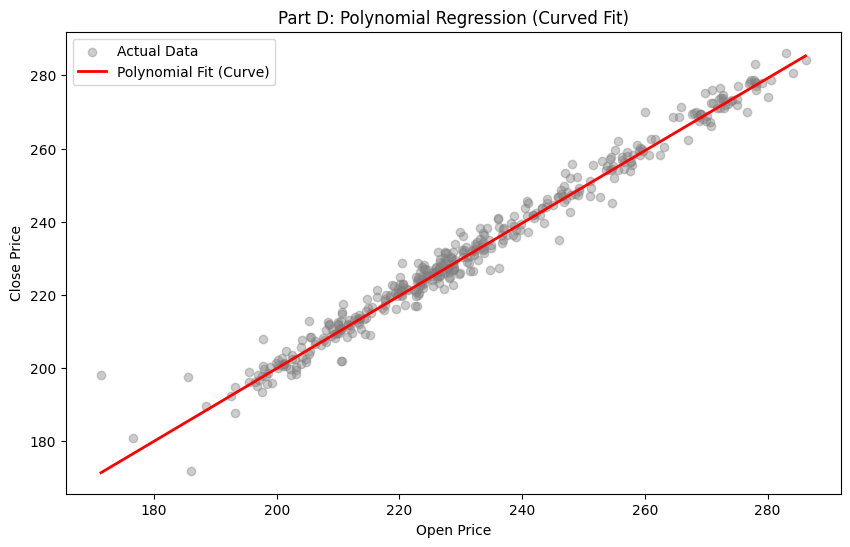

In [1]:
# ==============================================================================
# PART D: POLYNOMIAL REGRESSION
# ==============================================================================
# Goal: Capture non-linear relationships by squaring the features.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. FEATURE ENGINEERING
# ------------------------------------------------------------------------------
df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()

# We only need Apple data for this part
data['y'] = df_raw['Close']['AAPL'].astype(float)
data['Bias'] = 1.0
data['Open'] = df_raw['Open']['AAPL'].astype(float)

# POLYNOMIAL FEATURE: Square the Open Price (x^2)
# This allows the model to fit a parabola (curve) instead of a straight line.
data['Open_Sq'] = data['Open'] ** 2

data = data.dropna()

# Select Features: Bias, x, x^2
X = data[['Bias', 'Open', 'Open_Sq']].values
y = data['y'].values

# 2. TRAIN-TEST SPLIT (80% - 20%)
# ------------------------------------------------------------------------------
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training Data: {X_train.shape}")

# 3. TRAINING (NORMAL EQUATION)
# ------------------------------------------------------------------------------
# Even though we have x^2, it is still "Linear Regression" in terms of weights.
# Formula: theta = (X^T * X)^(-1) * X^T * y

def train_polynomial(X, y):
    X_T = X.T
    XTX = X_T.dot(X)
    
    # Use Pseudo-Inverse for stability (x^2 can create large numbers)
    XTX_inv = np.linalg.pinv(XTX)
    
    theta = XTX_inv.dot(X_T).dot(y)
    return theta

theta = train_polynomial(X_train, y_train)

print("\n--- Polynomial Coefficients ---")
print(f"Intercept: {theta[0]:.4f}")
print(f"Open (x):  {theta[1]:.4f}")
print(f"Open^2:    {theta[2]:.8f}") # This will be very small

# 4. VISUALIZATION
# ------------------------------------------------------------------------------
y_pred = X_test.dot(theta)

# Calculate R2
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"\nPolynomial R² Score: {r2:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,1], y_test, color='gray', alpha=0.4, label='Actual Data')

# To plot a smooth curve, we must sort the X values
sort_indices = np.argsort(X_test[:,1])
plt.plot(X_test[sort_indices, 1], y_pred[sort_indices], color='red', linewidth=2, label='Polynomial Fit (Curve)')

plt.title("Part D: Polynomial Regression (Curved Fit)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.legend()
plt.show()